# Financial Risk Analyser


<b> Video Link: </b> https://drive.google.com/file/d/1J7sIje1YzfuB9_8Nj7rXmexkG5BwWSvf/view?usp=sharing 
# Abstract

Loans serve as a foundational part of our economy that allows individuals to make large purchases or start businesses, and existing companies to expand their operations. However, how do financial institutions know when to let people borrow money? Today, FICO scores and credit scores are great evaluators of an individual's trustworthiness when it comes to paying off debts or loans, however, we wanted to take the opportunity to use machine learning techniques and data analysis to evaluate a loan applicant's financial features, such as FICO score, delinquencies, and loan grades, to help predict if they will default on their loan or not. We used several machine learning algorithms such as Support Vector Machines, Random Forest Classifiers, and K-nearest neighbors to make those predictions, all of which had varying scores for accuracy, F1-score, recall, and precision. Though each of our models had its strengths and weaknesses, we saw that the Random Forest Classifier would be the best as it performed moderately across the metrics mentioned previously. From this project, we learned that predicting the possibility of a person defaulting on their loan is very difficult as there could be possibly more reasons than financial features that could affect a person's ability to repay their loans such as unforeseen events and inconsistent spending habits. 

# Research Question

Between 2007-2018, can we use financial features (income, credit score, & debt-to-income ratio) to predict the likelihood of a loan applicant defaulting on their loan? Specifically, we will analyze factors such as income, credit score, employment title, loan amount, loan term, interest rate, and debt-to-income ratio to assess the probability of default.

## Background and Prior Work

Predicting loan default risk is essential for financial institutions to make informed lending decisions and manage risk efficiently. Recently, financial organizations have increasingly leveraged machine learning to predict default risks, enabling faster screening and more personalized loan terms. They have identified variables like credit score, income, and loan purpose as strong predictors of default risk.

Research by Chen et al. has highlighted the importance of model selection and feature engineering in enhancing prediction accuracy. They used logistic regression and neural networks on customer demographics and transaction data, showing that better feature selection can boost a model's predictive ability. Their findings emphasize the necessity of well-designed features that capture trends in borrower behavior, aligning with our aim to improve feature representation and model accuracy.<a name="cite_ref-1"></a><sup>1</sup>

Similarly, the Loan Default Prediction System evaluated logistic regression, decision trees, random forests, and neural networks, finding that variables like employment length and loan grade were highly predictive. This study highlighted the advantages of ensemble models for handling complex financial datasets and achieving better model performance.<a name="cite_ref-2"></a><sup>2</sup>

Our project introduces additional features like trends in debt-to-income ratios and regional economic data to better understand factors influencing loan defaults. Beyond accuracy, we focus on fairness by using advanced feature selection techniques designed to reduce demographic biases, ensuring the model functions ethically and fairly across all groups. By implementing methods such as fairness-aware adjustments and adversarial debiasing, we aim to build a loan default prediction model that is more transparent and accountable. This approach not only improves prediction accuracy but also supports the goal of making financial risk assessments fairer and more inclusive, leading to better lending practices.

---

<a name="cite_note-1"></a><sup>1</sup> Chen, H. et al. "Prediction and Analysis of Financial Default Loan Behavior Based on Machine Learning Model." *PMC*, 2022. [https://pmc.ncbi.nlm.nih.gov/articles/PMC9552691/#sec4](https://pmc.ncbi.nlm.nih.gov/articles/PMC9552691/#sec4)

<a name="cite_note-2"></a><sup>2</sup> "Loan Default Prediction System." *RIT Scholar Works*, 2021. [https://repository.rit.edu/cgi/viewcontent.cgi?article=12544&context=theses](https://repository.rit.edu/cgi/viewcontent.cgi?article=12544&context=theses)


# Hypothesis


We hypothesize that credit score, debt-to-income ratio, income, loan purpose, and assets are significant predictors of loan default likelihood. Specifically, we believe that credit score and income will be the most influential factors. Our reasoning is that a borrower’s credit score reflects their history of repaying loans, while their income indicates whether they have the financial means to meet repayment obligations. Together, these factors should provide strong indicators of loan default risk.

# Data

Data overview¶ For each dataset include the following information

Dataset: Accepted Loan Applicants Data

* Link to the dataset: https://www.kaggle.com/datasets/wordsforthewise/lending-club (we used the accepted loan applicants)
* Number of observations: Around 2260701 obervations (We had to break up the CSV into parts because it was too large for GitHub)
* Number of columns: 118
* Description: The All Lending Club Loan is a dataset that consists of people who got accepted for their loans, by Lending Club, a financial service located in San Francisco. We chose this dataset because it has useful features such as credit score (float64), history of late payments (float64), income (float64), debt-to-income ratio (float64), assets (like homeownership) (object), loan purpose (object), and loan status (object). With these features, we will be able to use machine learning to create a model to predict the likelihood of an applicant defaulting on their loan. We need to clean the dataframe because some columns are filled with null values and some columns have irrelevant information such as member_id and hardship_payoff_balance_amount - this means we will drop columns that aren't helpful for our analysis and machine learning model. We'll need to create a column to label if the indiviudal defaulted on their loan too, we can find if they did using the 'loan_status' column. Since the data was so large, we broke it up into multiple CSV's where we could also save some for training, validation, and testing for our machine learning model. There are about 75,000 observations with 118 columns in each CSV file


## Accepted Loan Applicants Data

In [46]:
# Packages that we plan on using on our Data - more to come as the quarter progresses
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import scipy.stats as stats
# Avoid Showing Warnings to make the report look nice
import warnings
warnings.filterwarnings("ignore")

In [47]:
# NOTE: This is one part of the entire data. GitHub wouldn't take the entire csv file because it was about 1GB (the rest of the csv's are in a folder)
accepted_loan_apps = pd.read_csv('loans_data/Accepted 2007 to 2018_1.csv')
accepted_loan_apps.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning
Below are the steps we performed when cleaing the data:
1. Keep the columns that will be useful for our investigation such as `grade`, `income`, and `dti`.
2. Remove any rows that contained all null values in it.
3. Columns that are string type and have missing values will be filled with NaN
4. Columns that are quantitative and have missing values will be filled with 0's
5. Keep the rows with the status that are important to our investigation. For example a loan status of 'current' will not be useful, so it'll be removed. We want either 'Default' or 'Fully Paid'.
6. Changed the `loan_status` of some rows to make it 'Default' based on their status.
7. Created an extra column of boolean type labeling if the individual defaulted on their loan - this will be helpful for our machine learning model

The data was somewhat clean to begin with, so there wasn't a ton of work to do,

In [48]:
# Load in some of the CSVs randomly from 1-35, we'll be selecting 24 of them work on
# the rest will be used for testing 
df_list = []
rng_csvs = np.random.choice(np.arange(1,36), size=24, replace = False)
for csv in rng_csvs:
    path_template = f'loans_data/Accepted 2007 to 2018_{csv}.csv'
    extracted_df = df = pd.read_csv(path_template, dtype={'column_name_0': str, 'column_name_19': str})
    df_list.append(extracted_df)

In [49]:
df = pd.concat(df_list, ignore_index=True)
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,55342154,NaN,8000.0,8000.0,8000.0,36 months,13.99,273.39,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,55657398,NaN,22000.0,22000.0,21925.0,60 months,17.86,556.99,D,D5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,55455590,NaN,20000.0,20000.0,20000.0,36 months,13.99,683.46,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
"""
Function Purpose:
This function will keep the columns that we believe are helpful to our prediction
"""
def cols_of_interest(loans): 
    df = loans.copy()
    useful_features = [
    # Borrower’s Financial and Credit History
    "fico_range_high",
    "fico_range_low",
    "delinq_2yrs",
    "acc_now_delinq",
    "pub_rec",
    "pub_rec_bankruptcies",
    "num_tl_90g_dpd_24m",
    "mths_since_last_delinq",
    "chargeoff_within_12_mths",
    "collections_12_mths_ex_med",
    "revol_util",
    "pct_tl_nvr_dlq",

    # Loan-Specific Information
    "loan_amnt",
    "funded_amnt",
    "int_rate",
    "term",
    "grade", # A-F (A least risky, F is very risky) 
    
    # Borrower’s Financial Behavior
    "dti",
    "total_rec_late_fee",
    "bc_util",
    "all_util",
    "num_accts_ever_120_pd",
    
    # Employment and Income
    "annual_inc",
    "emp_length",
    "verification_status",
    
    # Recent Borrowing Behavior
    "mths_since_recent_bc_dlq",
    "open_acc",
    "loan_status"
    ]

    df = df.loc[:,useful_features]
    return df

In [51]:
"""
This function will remove rows where every column is empty (NaN)
"""
def drop_full_na(loans):
    df = loans.copy()
    df = df.dropna(how='all')
    return df

In [52]:
"""
This function will fill in the columns object types with np.nan and columns with int/float types
with np.nan
"""
def fill_quantitative_vars(loans):
    df = loans.copy()
    df[loans.select_dtypes(include='object').columns] = df.select_dtypes(include='object').apply(lambda srs: srs.replace('', np.nan))
    df[loans.select_dtypes(include=['int','float64']).columns] = df.select_dtypes(include=['int','float64']).fillna(np.nan)
    return df

In [53]:
"""
This function will keep people who are fully paid, charged off, default
"""
def keep_status(loans):
    KEEP = ['Fully Paid',
            'Charged Off',
            'Does not meet the credit policy. Status:Fully Paid',
            'Does not meet the credit policy. Status:Charged Off',
            'Default'
           ]
               
    df = loans.copy()
    df = df[df['loan_status'].isin(KEEP)]
    return df
    

In [54]:
"""
This function will add a column in the DataFrame specifying if the person defaulted on their loa
or paid it off 
True = Defaulted
False = Paid Off
"""
def find_default(loans): 
    df = loans.copy()
    # List of statuses of people who are determined defaulted 
    DEFAULTED = ['Charged Off',
                'Default',
                'Does not meet the credit policy. Status:Charged Off']

    df['default'] = df['loan_status'].isin(DEFAULTED)
    
    return df

In [55]:
df = (df
     .pipe(cols_of_interest)
      .pipe(drop_full_na)
      .pipe(fill_quantitative_vars)
      .pipe(keep_status)
      .pipe(find_default)
     )



# Exploratory Data Analysis

In [56]:
df.dtypes

fico_range_high               float64
fico_range_low                float64
delinq_2yrs                   float64
acc_now_delinq                float64
pub_rec                       float64
pub_rec_bankruptcies          float64
num_tl_90g_dpd_24m            float64
mths_since_last_delinq        float64
chargeoff_within_12_mths      float64
collections_12_mths_ex_med    float64
revol_util                    float64
pct_tl_nvr_dlq                float64
loan_amnt                     float64
funded_amnt                   float64
int_rate                      float64
term                           object
grade                          object
dti                           float64
total_rec_late_fee            float64
bc_util                       float64
all_util                      float64
num_accts_ever_120_pd         float64
annual_inc                    float64
emp_length                     object
verification_status            object
mths_since_recent_bc_dlq      float64
open_acc    

In [57]:
df['loan_status'].value_counts()

loan_status
Fully Paid                                             754244
Charged Off                                            181604
Does not meet the credit policy. Status:Fully Paid       1988
Does not meet the credit policy. Status:Charged Off       761
Default                                                    23
Name: count, dtype: int64

### 1 - Annual Income & Loan Statuses
In this section, we're going to look at variables like annual income, DTI, FICO scores and grouping them by Default and Fully-Paid to see if there are any differences in their distributions.

Text(0.5, 1.0, 'Box Plot of Annual Incomes')

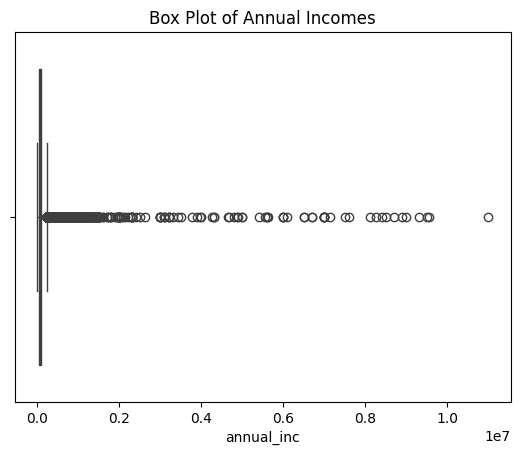

In [58]:
sns.boxplot(data = df, x='annual_inc', whis=3)
plt.title('Box Plot of Annual Incomes')

Text(0.5, 1.0, 'Log Transformed Annual Income Box Plot for Default and Fully-Paid Status')

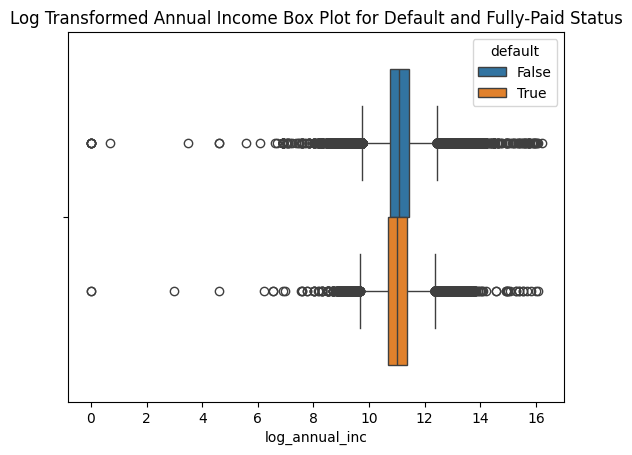

In [59]:
temp = df.copy()
temp['log_annual_inc'] = np.log(temp['annual_inc'])
sns.boxplot(data = temp, x = 'log_annual_inc', hue='default')
plt.title('Log Transformed Annual Income Box Plot for Default and Fully-Paid Status')

Text(0.5, 1.0, 'Log Transformed Annual Income KDE Plot for Default and Fully-Paid Status')

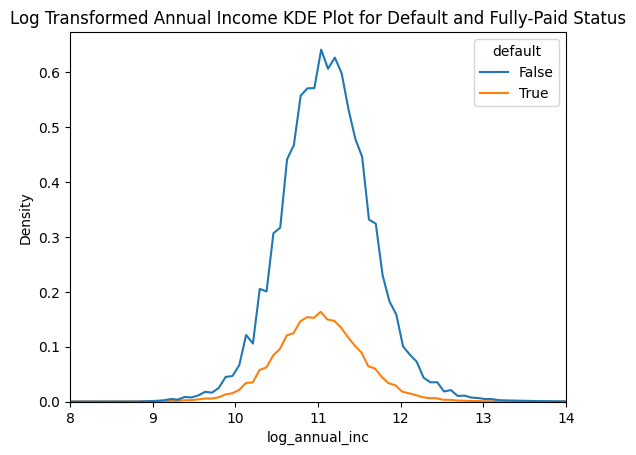

In [60]:
sns.kdeplot(data = temp, x = 'log_annual_inc', hue='default')
plt.xlim(8,14)
plt.title('Log Transformed Annual Income KDE Plot for Default and Fully-Paid Status')

In [61]:
# Take a look at the averages in normal values
default_avg = df.groupby('default')['annual_inc'].mean().loc[True]
paid_avg = df.groupby('default')['annual_inc'].mean().loc[False]
print(f'Default Avg Income: {default_avg}')
print(f'Fully Paid Avg Income: {paid_avg}')

Default Avg Income: 70423.92357682523
Fully Paid Avg Income: 77576.10604695938


<b> Analysis: </b> When comparing the box plots, we could see that there are several outlier points, but when looking at the median, they're pretty close. The IQRs look somewhat similar too. Looking at the two distributions(in the KDE Plot), the shapes seem the same, there just happens to be less people who default on their loans, which is good that most people aren't defaulting on their loans. When looking at the average incomes of deafult and fully paid groups, we see that people who fully-paid off their loans have a higher income than people who defaulted

### 2 - DTI & Loan Status

Text(0.5, 1.0, 'Box Plots of DTI grouped by Loan Status')

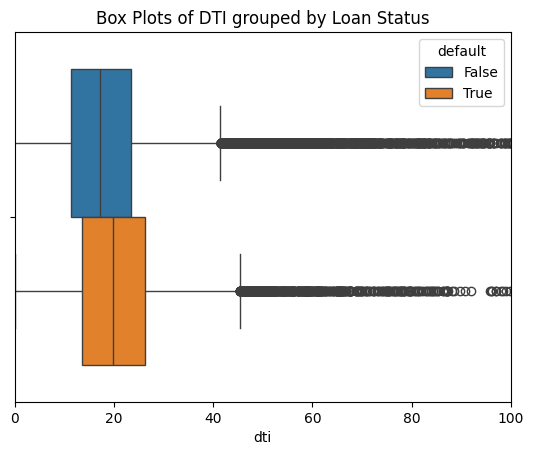

In [62]:
# Boxplot of DTI by Group
sns.boxplot(data = df, x='dti', hue='default')
plt.xlim(0, 100)
plt.title('Box Plots of DTI grouped by Loan Status')

Text(0.5, 1.0, 'Histograms of DTI grouped by Loan Status')

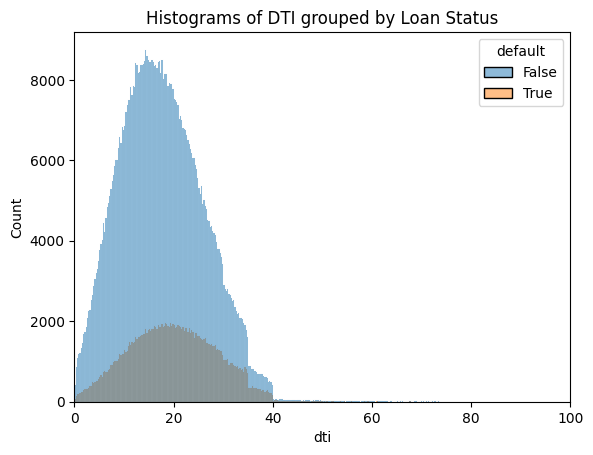

In [63]:
sns.histplot(data = df, x='dti', hue='default')
plt.xlim(0, 100)
plt.title('Histograms of DTI grouped by Loan Status')

In [64]:
default_avg = df.groupby('default')['dti'].mean().loc[True]
paid_avg = df.groupby('default')['dti'].mean().loc[False]
print(f'Default Avg DTI: {default_avg}')
print(f'Fully Paid Avg DTI: {paid_avg}')

Default Avg DTI: 20.101375673852598
Fully Paid Avg DTI: 17.771215590627


<b>Analysis:</b> Looking at the box plots, we see a ton of outliers, specifcally when the DTI is greater than 40. With some research, that DTI is extremely high and it's astonishing that their loan was approved. Looking at the histograme, the distribution for people that defaulted seems a bit more broader in shape, while the shape of the graph for people who fully-paid their loans is a bit more vertical. When finding the averages, we see that the DTI of people who Defaulted is greater than the people who fully-paid their loan - not by much though. We can see that the DTI is normally distributed amongst both groups too.

### 3 - FICO Scores by Status

Text(0.5, 1.0, 'Box Plots of FICO score by Loan Status')

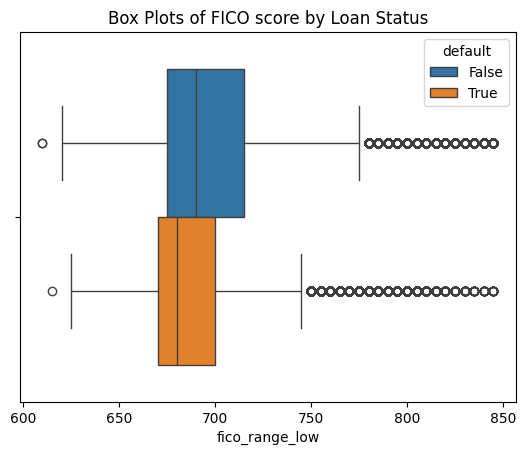

In [65]:
sns.boxplot(data = df, x='fico_range_low', hue='default')
plt.title('Box Plots of FICO score by Loan Status')

<b>Analysis:</b> From the box plot, we can determine that the median FICO score of individuals who deafaulted on their loans is significantly less than those who were able to fully pay of their loan. There does appear to be some outliers, but it doens't fall out of the confines of proper FICO scores (a score over 850 would be an issue becasue it isn't possible). This means that FICO score could be a strong indicator of people defaulting on their loan or not.

###  4 - Investigating FICO and DTI using Scatter
For the sake of being able to identify patterns, we're going to sample from the large DataFrame otherwise the graph becomes too cluttered and hard to read

In [66]:
sample_df = df.sample(5_000)
sample_df.head()

,fico_range_high,fico_range_low,delinq_2yrs,acc_now_delinq,pub_rec,pub_rec_bankruptcies,num_tl_90g_dpd_24m,mths_since_last_delinq,chargeoff_within_12_mths,collections_12_mths_ex_med,...,bc_util,all_util,num_accts_ever_120_pd,annual_inc,emp_length,verification_status,mths_since_recent_bc_dlq,open_acc,loan_status,default
1019059,669.0,665.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,59.8,NaN,1.0,98000.0,10+ years,Verified,29.0,8.0,Charged Off,True
1058685,674.0,670.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,...,71.4,NaN,0.0,40000.0,9 years,Source Verified,NaN,16.0,Fully Paid,False
993390,689.0,685.0,0.0,0.0,0.0,0.0,0.0,68.0,0.0,0.0,...,64.8,55.0,1.0,78500.0,10+ years,Source Verified,68.0,7.0,Fully Paid,False
1360094,724.0,720.0,0.0,0.0,0.0,0.0,0.0,26.0,0.0,0.0,...,17.3,59.0,1.0,100000.0,9 years,Source Verified,NaN,8.0,Fully Paid,False
176987,699.0,695.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,...,91.8,NaN,0.0,76000.0,2 years,Source Verified,NaN,18.0,Fully Paid,False


Text(0.5, 1.0, 'Regression Plot of FICO score and DTI')

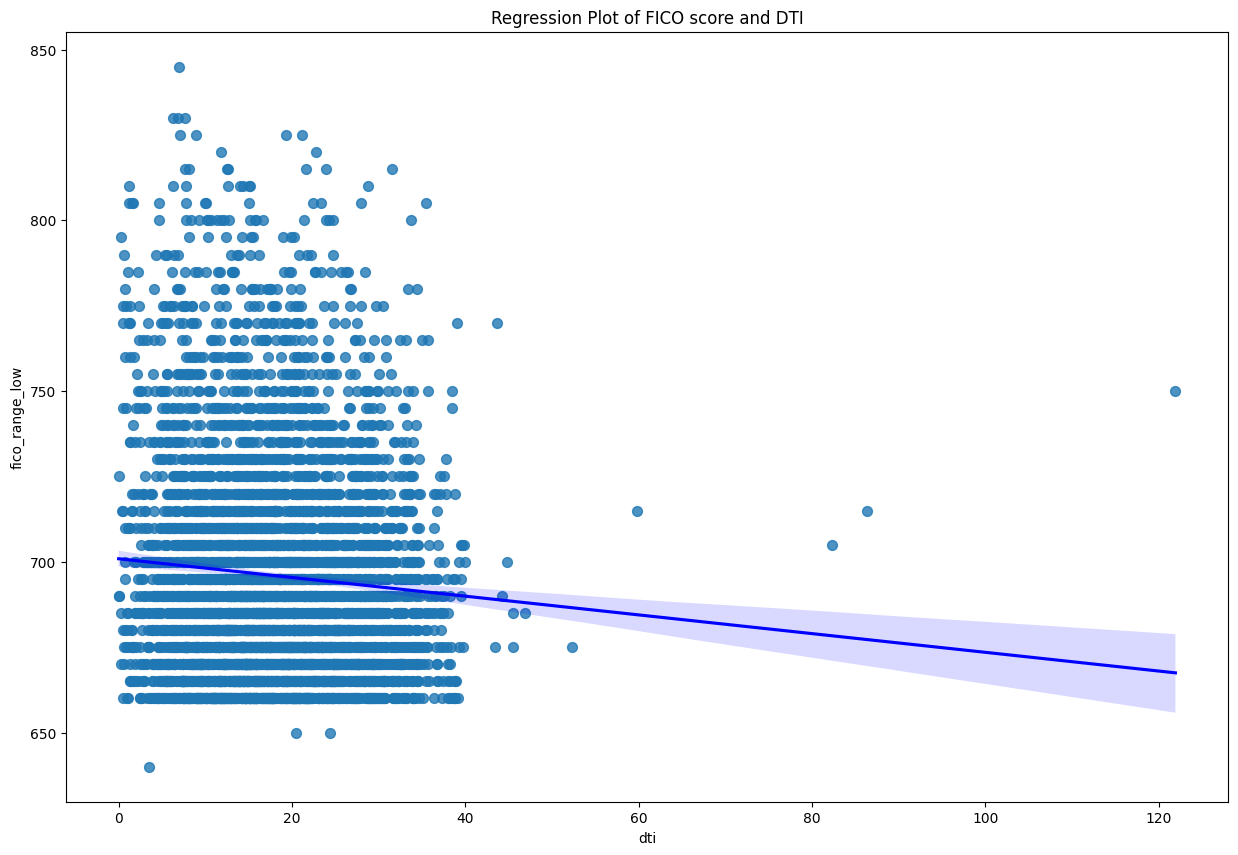

In [67]:
plt.figure(figsize=(15,10))

sns.regplot(data = sample_df, y = 'fico_range_low', x = 'dti', scatter_kws={"s": 50}, line_kws={"color": "blue"})
plt.title('Regression Plot of FICO score and DTI')

<b>Analysis:</b> For investigating the relationship between FICO and DTI, we created a scatter plot visualization because both of the variables are numeric. From this visualization, we can see that there is a negative correlation between FICO and DTI. In this case, it appears that as DTI increases, the FICO score will decrease.

### 5 - Looking at Delinquency within the Last 2 Years & Loan Status
This part we'll investigate the proportion of people that had delinquency in the past 2 years for each group. 

In [68]:
sample_df = df.sample(5_000)
sample_df.head()

,fico_range_high,fico_range_low,delinq_2yrs,acc_now_delinq,pub_rec,pub_rec_bankruptcies,num_tl_90g_dpd_24m,mths_since_last_delinq,chargeoff_within_12_mths,collections_12_mths_ex_med,...,bc_util,all_util,num_accts_ever_120_pd,annual_inc,emp_length,verification_status,mths_since_recent_bc_dlq,open_acc,loan_status,default
913880,724.0,720.0,0.0,0.0,1.0,1.0,0.0,NaN,0.0,0.0,...,20.2,29.0,0.0,170000.0,5 years,Source Verified,NaN,20.0,Fully Paid,False
232901,709.0,705.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,...,97.6,NaN,0.0,85000.0,3 years,Source Verified,NaN,8.0,Fully Paid,False
1253947,704.0,700.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,...,22.0,31.0,0.0,29510.0,< 1 year,Verified,NaN,8.0,Charged Off,True
1112035,689.0,685.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,...,76.3,68.0,0.0,48500.0,< 1 year,Verified,NaN,11.0,Charged Off,True
692661,714.0,710.0,0.0,0.0,1.0,1.0,0.0,NaN,0.0,0.0,...,67.2,NaN,0.0,70000.0,10+ years,Not Verified,NaN,10.0,Fully Paid,False


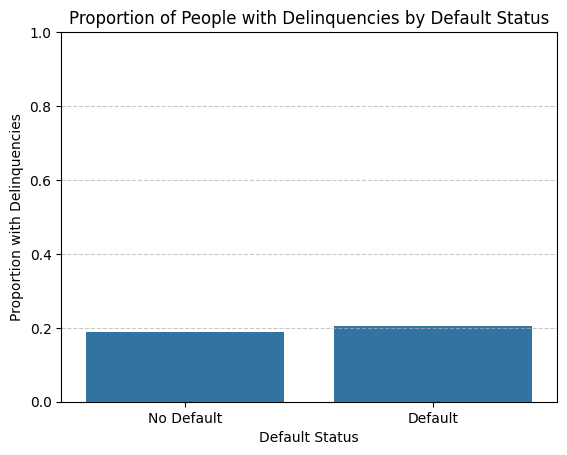

In [69]:
temp = df.copy()
temp['had_delinq_2yrs'] = temp['delinq_2yrs'] > 0 
temp.groupby('default')['had_delinq_2yrs'].mean()

proportions = temp.groupby('default')['had_delinq_2yrs'].mean().reset_index()

# Plot
sns.barplot(data=proportions, x='default', y='had_delinq_2yrs')
plt.title('Proportion of People with Delinquencies by Default Status')
plt.ylabel('Proportion with Delinquencies')
plt.xlabel('Default Status')
plt.xticks(ticks=[0, 1], labels=['No Default', 'Default'])
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<b>Analysis:</b> It appears that a greater proportion of people that deafulted on their loan have had a delinquency within the past 2 years. This could be a variable that should be considered when forming our prediciton model

### 6 - Number of Accounts Open and Loan Status

(0.0, 50.0)

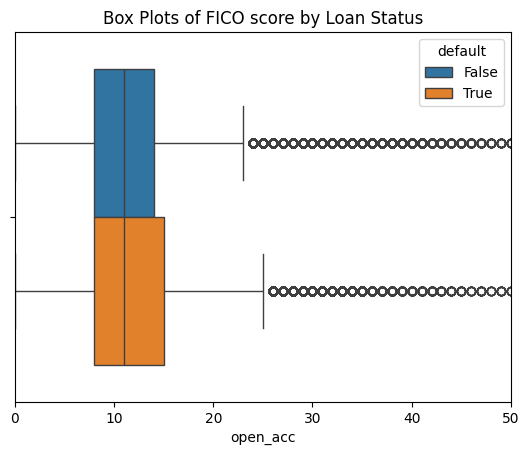

In [70]:
sns.boxplot(data = df, x='open_acc', hue='default')
plt.title('Box Plots of FICO score by Loan Status')
plt.xlim(0, 50)

<b> Analysis: </b> There doesn't seem to be a significant difference in the amount of accounts that will be open for a person that defaulted on their loan and people that are able to fully-pay them. The medians are approximately the same and IQR of the people who default is slightly larger.

### 7 - Grade of the Loan and Loan Status

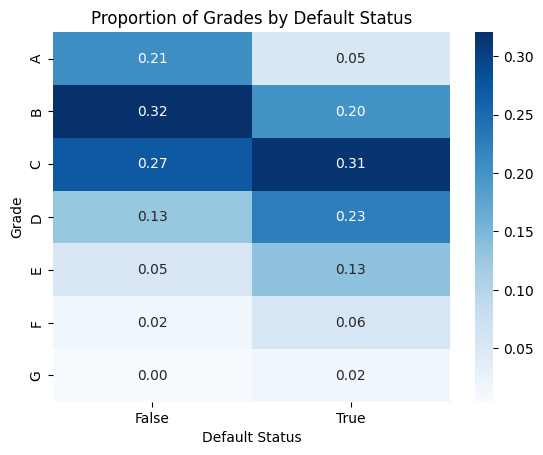

In [71]:
# Make a pivot table 
piv = df.pivot_table(index='grade', columns = 'default', aggfunc='size', fill_value=0)
piv_prop = piv.div(piv.sum(axis=0), axis=1)  # Normalize to get proportions
sns.heatmap(piv_prop, annot=True, fmt=".2f", cmap="Blues")

# Add labels and title
plt.title("Proportion of Grades by Default Status")
plt.xlabel("Default Status")
plt.ylabel("Grade")
plt.show()

<b> Analysis: </b> The heatmap highlights that as loan grades move from A to E, the proportion of defaults increases, suggesting that lower loan grades are associated with higher default risk. This insight supports using loan grade as a critical feature in predicting whether a borrower will default.

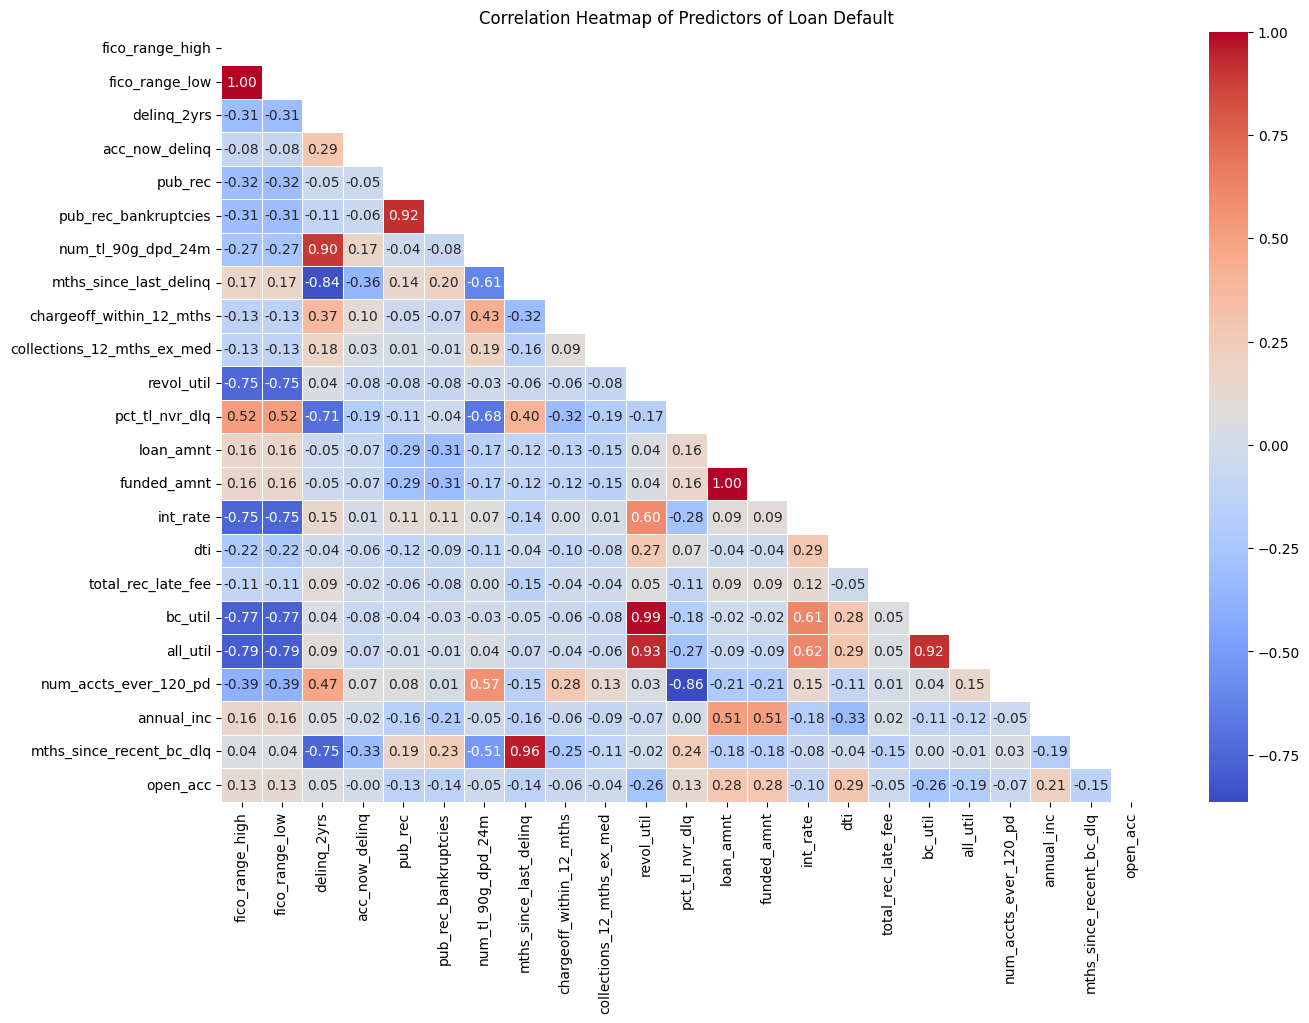

In [72]:
# Calculate the correlation matrix for numerical columns only
corr_matrix = df.select_dtypes(include=[np.number]).corr()
corr_matrix = corr_matrix.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Predictors of Loan Default')
plt.show()


<b> Analysis: </b>There are several interesting correlations here, but one especially notable one is that net income is associated positively with loan amount and negatively with interest rate. This could be an explanation for those with higher incomes do not default as much, since they are able to meet their needs with the loan, then also do not have to pay as much for it since they have lower interest.

# Making Predictions

In this section, we're going to use classification algorithms such as Support Vector Machine (SVM), K-nearest neighbors (KNN), and Random Forest Classifier to predict if a person will default on their loan using some of the data we investigated above.  Data preprocessing will needed to be to be done because we have to transform some columns into numbers such as `grade` because it is a categorical. We will standardize some of the numerical values we have as well.

## Using an SVM Model:

We will use an SVM model with some variables that we performed EDA on to see if we are able to predict if a person will default on their loan or not

In [73]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score, f1_score

In [74]:
# Four Variables of Interest and the Loan status
data = df[['dti', 'fico_range_low', 'grade', 'default', 'int_rate']]
data = data.dropna(subset = ['dti']) # drop the missing DTIs 

In [75]:
# Dictionary for the results of our Models
model_results = pd.DataFrame(columns = ['accuracy', 'recall', 'precision', 'f1'])

In [76]:
# Changed DF
data_transformed = data.copy()

### Preprocessing Steps
1. One Hot Encode the Defaulted Column
2. Ordinal Encode the Grades of the Loan
3. Standardize the DTI Column & FICO Score

In [77]:
# Ordinal Encoding Helper 
def ordinal_encoder(df):
    encoder = {'A': 0,
               'B': 1,
               'C': 2,
               'D': 3,
               'E': 4,
               'F': 5,
               'G': 6}
    df['grade'] = df['grade'].map(encoder)
    return df

In [78]:
# Standard Scaling: 
scaler = StandardScaler()
data_transformed['dti'] = scaler.fit_transform(data_transformed[['dti']])

scaler2 = StandardScaler()
data_transformed['fico_range_low'] = scaler2.fit_transform(data_transformed[['fico_range_low']])

scaler3 = StandardScaler() 
data_transformed['int_rate'] = scaler3.fit_transform(data_transformed[['int_rate']])

func_trans = FunctionTransformer(ordinal_encoder)
data_transformed['grade'] = func_trans.fit_transform(data_transformed[['grade']])

In [79]:
X_train, X_test, y_train, y_test = train_test_split(data_transformed.drop('default', axis=1), data_transformed['default'], test_size=0.25, random_state=42)

### Finding the Ideal Parameters for our SVM Classifier
For this part, we'll try out multiple hyperparameters to see which gives us the best validation score. The model with the best validation score will be our final model to use on the test data set. Due to the lack of processing power we have, we had to cut the training set the 10,000 points

In [80]:
param_grid = {
    'C': [0.1, 1, 5 ,10],
    'kernel': ['linear', 'rbf', 'poly'],
    'class_weight': ['balanced', None]
}

grid_search = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
)

grid_search.fit(X_train[:10_000], y_train[:10_000])

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best estimator: {grid_search.best_estimator_}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
model_results.loc['SVM'] = [accuracy_score(y_test, y_pred),
                            recall_score(y_test,y_pred),
                            precision_score(y_test, y_pred),
                            f1_score(y_test, y_pred)
                           ]
                                            
print(classification_report(y_test, y_pred))

Best parameters: {'C': 0.1, 'class_weight': None, 'kernel': 'linear'}
Best estimator: SVC(C=0.1, kernel='linear')
              precision    recall  f1-score   support

       False       0.80      1.00      0.89    188740
        True       0.00      0.00      0.00     45858

    accuracy                           0.80    234598
   macro avg       0.40      0.50      0.45    234598
weighted avg       0.65      0.80      0.72    234598



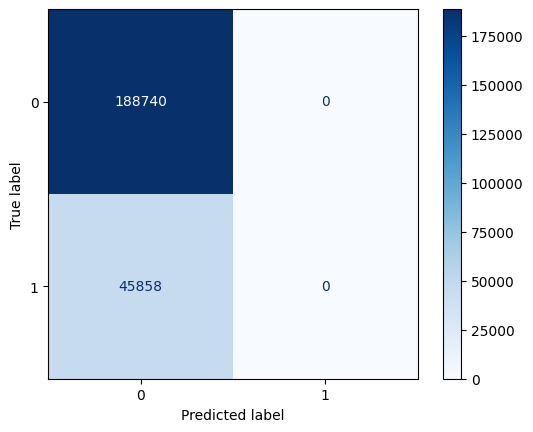

In [81]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

<b> Analysis: </b> Above is a confusion matrix, which is great visualization for checking the accuracy of any model that classifies individuals. We will be using this for our other two models as well. To give a description of which each box means in the context of our prediction:

* <b>True Negatives (Top Left):</b> The person did not default on their loan, and the model predicted that they would not default. This is a correct classification.

* <b>False Positives (Top Right):</b> The person did not default on their loan, but the model predicted that they would default. This is an incorrect classification.

* <b>False Negatives (Bottom Left):</b> The person did default on their loan, but the model predicted that they would not default. This is another incorrect classification.

* <b>True Positives (Bottom Right):</b> The person did default on their loan, and the model predicted that they would default. This is a correct classification.

## KNN Classifier
* For this part, we'll use a K-Nearest Neighbors classifer to predict if people will default on their loans
* We'll be using the same preprocessing steps above for this prediction.

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [83]:
from tqdm.notebook import tqdm
n_neighbors = [x for x in range(1,20,2)] # odd numbers through 20

for k in tqdm(n_neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    results = cross_val_score( knn, X_train[:15_000], y_train[:15_000], cv=5)
    print('For ',k,' neighbors validation accuracy is ',np.mean(results))

  0%|          | 0/10 [00:00<?, ?it/s]

For  1  neighbors validation accuracy is  0.7080000000000001
For  3  neighbors validation accuracy is  0.7513333333333334
For  5  neighbors validation accuracy is  0.7672666666666668
For  7  neighbors validation accuracy is  0.7767333333333333
For  9  neighbors validation accuracy is  0.7862666666666667
For  11  neighbors validation accuracy is  0.7864666666666666
For  13  neighbors validation accuracy is  0.7901333333333334
For  15  neighbors validation accuracy is  0.7931999999999999
For  17  neighbors validation accuracy is  0.7946
For  19  neighbors validation accuracy is  0.7960666666666667


<b> Analysis of Model </b>: In our KNN classifer, it seems that as we got the largest validation accuracy when k=19, so let's use that for our test set

In [84]:
# Using the test set now 
knn_test = KNeighborsClassifier(n_neighbors=19)
knn_test.fit(X_train, y_train)
predicted = knn_test.predict(X_test)
model_results.loc['KNN'] = [accuracy_score(y_test, predicted),
                            recall_score(y_test,predicted),
                            precision_score(y_test, predicted),
                            f1_score(y_test, predicted)
                           ]

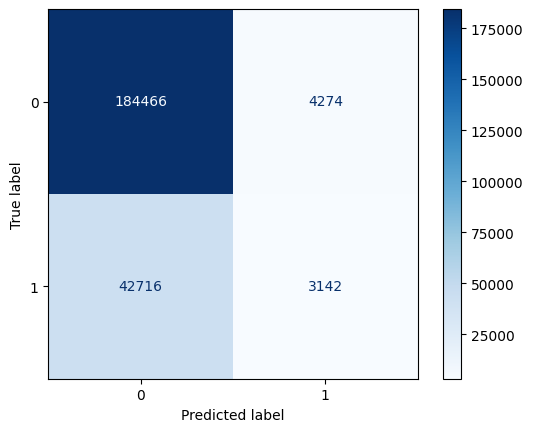

In [85]:
# Confusion Matrix
cm_knn = confusion_matrix(y_test, predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Random Forest Classifier:

In [86]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [87]:
rff_X = data.copy()[['dti','grade','fico_range_low', 'default']]

In [88]:
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# 1. Impute Missing Values
rff_X['dti'] = num_imputer.fit_transform(rff_X[['dti']]).ravel()
rff_X['fico_range_low'] = num_imputer.fit_transform(rff_X[['fico_range_low']]).ravel()
rff_X['grade'] = cat_imputer.fit_transform(rff_X[['grade']]).ravel()

# 2. Encode Categorical Variables
label_encoder = LabelEncoder()
rff_X['grade'] = label_encoder.fit_transform(rff_X['grade'])

X_train, X_test, y_train, y_test = train_test_split(rff_X.drop('default', axis=1)[:15_000], rff_X['default'][:15_000], test_size=0.25, random_state=42)

# Train Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

model_results.loc['Random Forest'] = [accuracy_score(y_test, y_pred),
                            recall_score(y_test,y_pred),
                            precision_score(y_test, y_pred),
                            f1_score(y_test, y_pred)
                           ]

# Evaluate Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7210666666666666

Classification Report:
               precision    recall  f1-score   support

       False       0.81      0.84      0.83      2959
        True       0.32      0.28      0.30       791

    accuracy                           0.72      3750
   macro avg       0.56      0.56      0.56      3750
weighted avg       0.71      0.72      0.71      3750



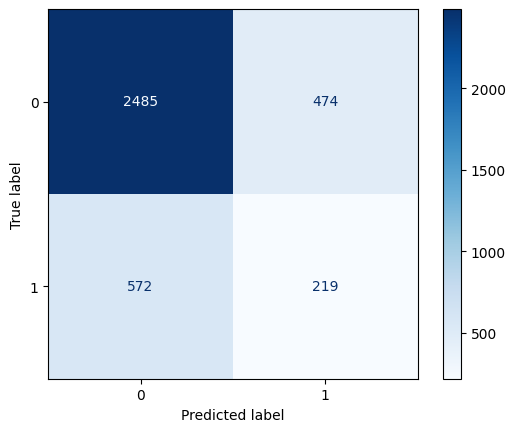

In [89]:
cm_rf = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Comparing our 3 Models: 

Text(0, 0.5, 'Score')

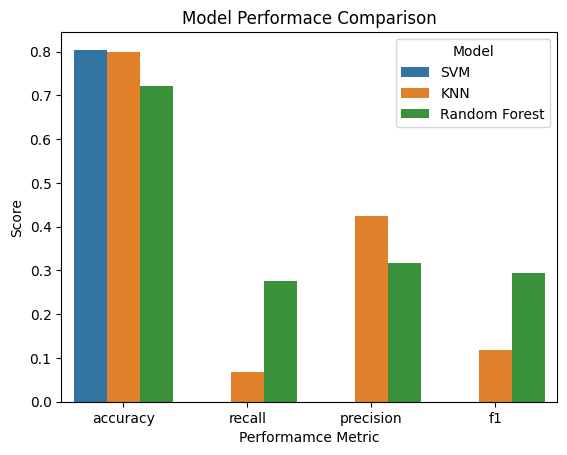

In [90]:
melted = model_results.reset_index(names='Model').melt(id_vars='Model')
g = sns.barplot(x = 'variable', y = 'value' , data = melted, hue = 'Model' )
plt.title('Model Performace Comparison')
plt.xlabel('Performamce Metric')
plt.ylabel("Score")

### Analyis of Models:
Of the 3 models we used to classify whether a person would default on their loan we found that the Support Vector Machine (SVM) model has the greatest accuracy, followed by K-Nearest Neighbors (KNN) then Random Forest. As for Recall and F1 scores, our Random Forest classifier performed the best in those metrics, while KNN did the best for precision. It is notable that our SVM model predicted every observation as will not default, which led to it having 0 recall, precision and f1 score - showing that accuracy shouldn't be the only metric we should be looking for!

# Ethics & Privacy

Our project prioritizes minimizing bias, particularly in sensitive demographic variables, to ensure fairness and privacy. Loan approval decisions have significant personal impacts, and it's essential to avoid discrimination in model predictions.

We will use a publicly available Lending Club dataset from Kaggle, which does not include private or sensitive information that could lead to privacy concerns. This dataset appears free from demographic biases, as it does not contain variables that directly target specific populations. 

However, if we incorporate additional data, such as Federal Financial Institution records, which include ethnic background information, we recognize the potential for biases to arise. To address this, we will carefully select features that support equitable analysis and exclude variables that might unfairly impact specific demographics.

Throughout the project, we will assess and document any potential ethical risks in data handling, processing, and analysis to ensure that our model remains fair and privacy-conscious.

# Discusison and Conclusion

The purpose of this project was to find what features indicate that a borrower will default on their loan. To achieve this, we used data from LendingClub, a financial services company that offers personal loans since 2007. We predicted that credit score, debt-to-income ratio, income, loan purpose, and assets are significant predictors of loan default likelihood. We thought credit score would be one of the most important factors when determining whether someone would default because it indicates whether someone has paid back their loans in the past. We also believed that income would be a significant factor because someone with a higher income will have an easier time paying back their loan, and as a result will be less likely to default.

Since loans are typically granted based on multiple interconnected factors such as credit scores, personal income, and the debt-to-income (DTI) ratio, these variables collectively represent a borrower’s financial health and ability to repay. By leveraging this wealth of information, we believe it is possible to train a machine learning model that can classify the safety of providing a loan. During the EDA and Data cleaning we discovered that some variables showed greater effects on loan return success compared to others. Firstly, FICO scores were seen as highly significant. FICO scores are a direct measure of a borrower’s creditworthiness, based on their history of timely repayments, credit utilization, and overall financial behavior. Our box plot on the same, shows that the median FICO score of individuals who defaulted on their loans is significantly less than those who were able to fully pay off their loan. We also noticed the importance of the DTI Score. The DTI ratio represents the percentage of a borrower’s monthly income that goes toward paying debts. We see that the DTI of people who Defaulted is greater than the people who fully-paid their loan (as shown by our histogram). Lastly, one of our most statistically significant variables was loan grade. Loan grades (ranging from A to F) are assigned by lending institutions based on perceived risk. The proportion of defaults increased as the loan grade moved from A (least risky) to F (most risky). This makes it a strong predictor of loan outcomes, as lower grades are generally assigned to higher-risk borrowers

After running our cleaned data through a machine learning model, we used DTI, FICO score, and loan grade to predict whether a borrower would default. Debt-to-Income ratio is a measure of how much a borrower's income goes towards paying debt. A FICO score assesses a borrower's creditworthiness through Payment history, Current level of indebtedness, Types of credit used, Length of credit history and Number of New credit accounts. Finally, loan grade is similar to a credit score, but is a measure of how likely a loaner thinks the borrower is to repay the loan. By running an Support vector machine (SVM) model on these three features, we got an 80% accuracy. We also ran these three features on a random forest classifier, which got an accuracy of 74%. This indicates that those three features are the primary features in deciding whether a borrower will default on their loan, which is slightly different from our original hypothesis that income and DTI would be the best predictors.


# Team Contributions

Speficy who did what.  This should be pretty granular, perhaps bullet points, no more than a few sentences per person.
- Rick Rodness: Project Proposal Ideas, Overview, Background Research and Prior Work
- Abhay Anand: Basic Data Preprocessing, Random Forest, Conclusion and Discussion
- Brian Docena: Data Overview and Privacy / Ethics
- Brian Huynh: EDA, Data Cleaning, KNN, and SVM
- Ryan Livengood: Hypothesis, Data Visualization, Discussion & Conclusion, 
